### Task 1

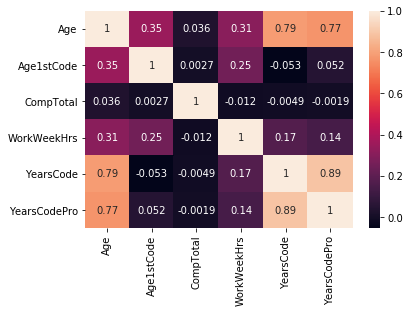

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from scipy import stats
from sklearn.metrics import mean_squared_error

# chose 5 numerical columns
chosen_cols = ['Respondent', 'Age', 'Age1stCode', 'YearsCode', 'YearsCodePro', 'CompTotal', 'WorkWeekHrs', 'Hobbyist', 'OpSys']
df = pd.read_csv("C:/Users/macko/Repos/Machine_learning/survey_results_public.csv", 
                 usecols=chosen_cols,
                 index_col='Respondent').dropna()

# change string values to numbers
df.loc[df['YearsCode'] == 'Less than 1 year'] = 0
df.loc[df['YearsCode'] == 'More than 50 years'] = 60
df.loc[df['YearsCodePro'] == 'Less than 1 year'] = 0
df.loc[df['Age1stCode'] == 'Younger than 5 years'] = 4

# change types to integer
df['Age'] = df['Age'].astype(int)
df['YearsCode'] = df['YearsCode'].astype(int)
df['YearsCodePro'] = df['YearsCodePro'].astype(int)
df['Age1stCode'] = df['Age1stCode'].astype(int)

# # sort out invalid values - week has max 168 hours
# df = df[(df['WorkWeekHrs'] <= 168)

# correlation map
corr_before = sns.heatmap(df.corr(), annot=True)
plt.show()

In [137]:
# dchosen numeric columns
cols = df.columns.values.tolist()
cols.remove('Hobbyist')
cols.remove('OpSys')

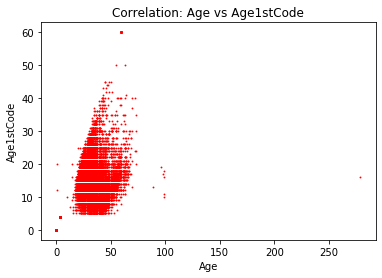

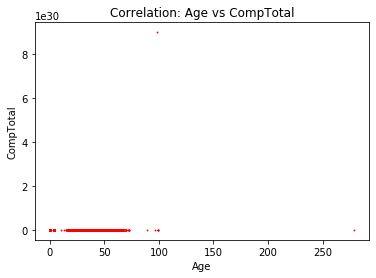

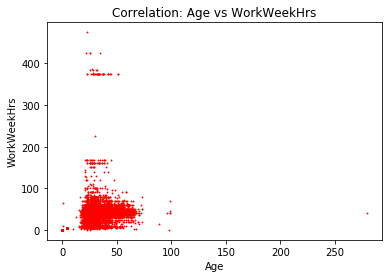

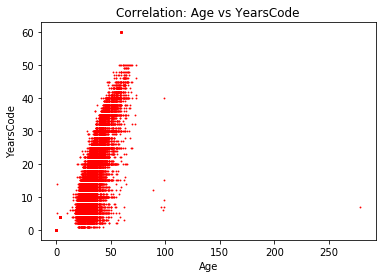

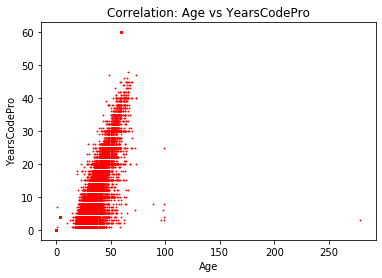

In [138]:
i = 0
# display correlation plots
for i in range (0, 5):
    plt.plot(df['Age'], df[cols[i+1]], 'rp', markersize=1)
    plt.xlabel('Age')
    plt.ylabel(cols[i+1])
    plt.title('Correlation: ' + 'Age vs ' + cols[i+1])
    plt.show()

### Task 2

In [139]:
# Converting string to a number
hobby_dict = {'Yes': 1, 'No': 0, 0: 2, 4: 2, 60: 2}
df['Hobbyist'] = df['Hobbyist'].map(hobby_dict)
df['Hobbyist'].dropna(inplace=True)

### One-hot Encoding
It is a type of vector representation in which all of the elements in a vector are 0, except for one, which has 1 as its value, where 1 represents a boolean specifying a category of the element.

One-hot encoding transforms categorical features to a format that works better with classification and regression algorithms. It's very useful in methods where multiple types of data representation is necessary.

In [140]:
df_ohe = pd.get_dummies(df["OpSys"])
df_ohe.drop([0, 4, 60], axis='columns', inplace=True)
df.describe()

,Hobbyist,Age,Age1stCode,CompTotal,WorkWeekHrs,YearsCode,YearsCodePro
count,29748.000000,29748.000000,29748.000000,2.974800e+04,29748.000000,29748.000000,29748.000000
mean,0.826408,30.932264,14.387421,3.021658e+26,38.973499,14.105184,8.482990
std,0.486672,10.656102,5.673677,5.211638e+28,18.857991,9.615469,7.717092
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1.000000,26.000000,12.000000,1.300000e+04,38.000000,7.000000,3.000000
50%,1.000000,30.000000,14.000000,6.000000e+04,40.000000,12.000000,6.000000
75%,1.000000,36.000000,17.000000,1.200000e+05,42.000000,20.000000,12.000000
max,2.000000,279.000000,60.000000,8.988829e+30,475.000000,60.000000,60.000000


### Task 3

In [141]:
# on base of file regression-v0.ipynb


# quantiles determine % of records for each variable
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# taking only records that are in intevals: x < 25%, x > 75%
# it must be so, otherwise it would be taken values x < 75% and x > 25%, so basically whole interval
df_q = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Before droping quantile-values:')
df.describe()

Before droping quantile-values:


,Hobbyist,Age,Age1stCode,CompTotal,WorkWeekHrs,YearsCode,YearsCodePro
count,29748.000000,29748.000000,29748.000000,2.974800e+04,29748.000000,29748.000000,29748.000000
mean,0.826408,30.932264,14.387421,3.021658e+26,38.973499,14.105184,8.482990
std,0.486672,10.656102,5.673677,5.211638e+28,18.857991,9.615469,7.717092
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1.000000,26.000000,12.000000,1.300000e+04,38.000000,7.000000,3.000000
50%,1.000000,30.000000,14.000000,6.000000e+04,40.000000,12.000000,6.000000
75%,1.000000,36.000000,17.000000,1.200000e+05,42.000000,20.000000,12.000000
max,2.000000,279.000000,60.000000,8.988829e+30,475.000000,60.000000,60.000000


In [142]:
# drop outliers on base of quantlies
df = df.drop(df_q.index)
print('After droping quantile-values:')
df.describe()

After droping quantile-values:


,Hobbyist,Age,Age1stCode,CompTotal,WorkWeekHrs,YearsCode,YearsCodePro
count,14382.0,14382.000000,14382.000000,14382.000000,14382.000000,14382.000000,14382.000000
mean,1.0,31.158184,14.106800,64774.178974,40.045649,14.215895,7.946809
std,0.0,6.547591,3.741397,55106.405642,2.739277,7.788931,5.826110
min,1.0,15.000000,5.000000,0.000000,32.000000,1.000000,1.000000
25%,1.0,26.000000,12.000000,18000.000000,40.000000,8.000000,3.000000
50%,1.0,30.000000,14.000000,55000.000000,40.000000,13.000000,6.000000
75%,1.0,35.000000,17.000000,96000.000000,40.000000,20.000000,11.000000
max,1.0,51.000000,24.000000,280000.000000,48.000000,39.000000,25.000000


In [143]:
# standard Deviation - ie. take only records that are within +- 3 sd
df_sd = df[cols][np.abs(df[cols] - df[cols].mean()) <= 3 * df[cols].std()]
print('Before droping sd-values:')
df_sd.dropna(inplace=True)
df.describe()

Before droping sd-values:


,Hobbyist,Age,Age1stCode,CompTotal,WorkWeekHrs,YearsCode,YearsCodePro
count,14382.0,14382.000000,14382.000000,14382.000000,14382.000000,14382.000000,14382.000000
mean,1.0,31.158184,14.106800,64774.178974,40.045649,14.215895,7.946809
std,0.0,6.547591,3.741397,55106.405642,2.739277,7.788931,5.826110
min,1.0,15.000000,5.000000,0.000000,32.000000,1.000000,1.000000
25%,1.0,26.000000,12.000000,18000.000000,40.000000,8.000000,3.000000
50%,1.0,30.000000,14.000000,55000.000000,40.000000,13.000000,6.000000
75%,1.0,35.000000,17.000000,96000.000000,40.000000,20.000000,11.000000
max,1.0,51.000000,24.000000,280000.000000,48.000000,39.000000,25.000000


In [144]:
df_no_outliers = df
print('After droping sd-values:')
df.drop(df_sd.index, inplace=True)
df_no_outliers.describe()

After droping sd-values:


,Hobbyist,Age,Age1stCode,CompTotal,WorkWeekHrs,YearsCode,YearsCodePro
count,242.0,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,1.0,37.615702,12.640496,206006.780992,40.511983,22.838843,13.495868
std,0.0,8.984833,3.825945,81972.594144,2.950543,11.173605,7.806396
min,1.0,22.000000,5.000000,1000.000000,32.000000,4.000000,1.000000
25%,1.0,30.000000,10.000000,166250.000000,40.000000,13.000000,6.000000
50%,1.0,37.000000,12.000000,250000.000000,40.000000,22.000000,13.500000
75%,1.0,46.000000,15.000000,250000.000000,40.000000,34.750000,20.000000
max,1.0,51.000000,21.000000,280000.000000,48.000000,39.000000,25.000000


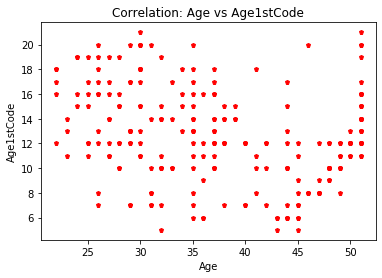

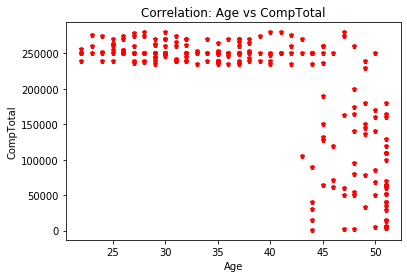

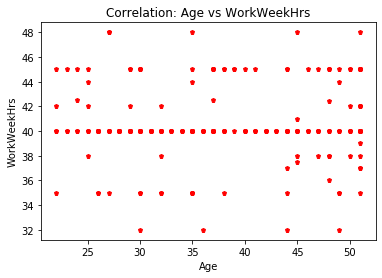

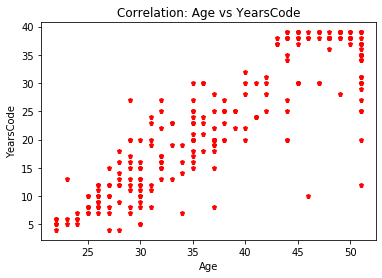

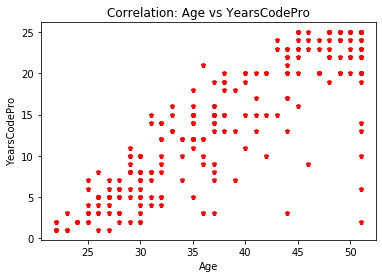

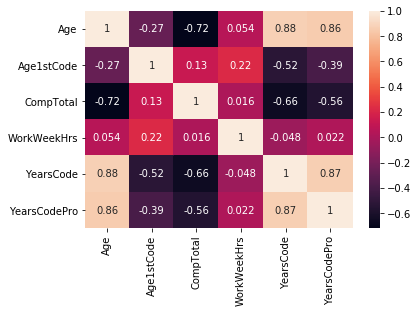

In [145]:
# add one-hot encoding values
df_no_outliers = df_no_outliers.merge(df_ohe, left_on='Respondent', right_on='Respondent')

# check plots once again
i = 0
# display correlation plots
for i in range (0, 5):
    plt.plot(df['Age'], df[cols[i+1]], 'rp', markersize=5)
    plt.xlabel('Age')
    plt.ylabel(cols[i+1])
    plt.title('Correlation: ' + 'Age vs ' + cols[i+1])
    plt.show()

sns.heatmap(df_no_outliers[cols].corr(), annot=True)
plt.show()

### Task 4

In [150]:
# dependent variable 
y = df_no_outliers[['WorkWeekHrs']]
# independent variables
x1 = df_no_outliers[['Age']]
x2 = df_no_outliers[['Age1stCode']]
args = x1.join(x2)
# merge(x2, left_on='Respondent', right_on='Respondent')
args2 = df_no_outliers[['Age', 'Age1stCode', 'MacOS', 'Hobbyist']]

In [151]:
# linear regression models + MSE
reg_mod = linear_model.LinearRegression()
reg_mod.fit(x1, y)
test_val = [20]
prediction = reg_mod.predict([test_val])
print('Prediction:\t', prediction,
      '\nCoefficients:\t', reg_mod.coef_)
print('MSE:\t %.2f' % (mean_squared_error(y, reg_mod.predict(x1))))

Prediction:	 [[40.19995342]] 
Coefficients:	 [[0.01771318]]
MSE:	 8.64


In [152]:
# linear regression models + MSE
reg_mod = linear_model.LinearRegression()
reg_mod.fit(args, y)
test_val = [20, 21]
prediction = reg_mod.predict([test_val])
print('Prediction:\t', prediction,
      '\nCoefficients:\t', reg_mod.coef_)
print('MSE:\t %.2f' % (mean_squared_error(y, reg_mod.predict(args))))

Prediction:	 [[41.44493037]] 
Coefficients:	 [[0.04014605 0.19620156]]
MSE:	 8.12


In [153]:
# linear regression models + MSE
reg_mod = linear_model.LinearRegression()
reg_mod.fit(args2, y)
test_val = [20, 21, 0, 1]
prediction = reg_mod.predict([test_val])
print('Prediction:\t', prediction,
      '\nCoefficients:\t', reg_mod.coef_)
print('MSE:\t %.2f' % (mean_squared_error(y, reg_mod.predict(args2))))

Prediction:	 [[41.4449558]] 
Coefficients:	 [[ 4.01455837e-02  1.96201448e-01 -5.94345067e-05  0.00000000e+00]]
MSE:	 8.12
